# Valve Classification Model


A jupyter notebook to create the classification model for the fan machines.


### Getting the dataset

First is to import the necessary libraries needed

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

Then import the dataset. This dataset was extracted from the sound files.

In [20]:
df = pd.read_csv('../datasets/valve_full_features.csv')

In [21]:
df.shape

(12510, 76)

In [22]:
df.columns

Index(['Unnamed: 0', 'Type of SNR', 'Type of Machine', 'Model Number',
       'Status', 'File Name', 'y', 'SR', 'y mean', 'y max', 'y min',
       'chroma_stft min', 'chroma_stft mean', 'chroma_stft max',
       'chroma_cqt min', 'chroma_cqt mean', 'chroma_cqt max',
       'chroma_cens min', 'chroma_cens mean', 'chroma_cens max',
       'melspectogram min', 'melspectogram mean', 'melspectogram max',
       'mfcc min', 'mfcc mean', 'mfcc max', 'rms min', 'rms mean', 'rms max',
       'spectral_centroid min', 'spectral_centroid mean',
       'spectral_centroid max', 'spec_bw min', 'spec_bw mean', 'spec_bw max',
       'spec_contrast min', 'spec_contrast mean', 'spec_contrast max',
       'flatness min', 'flatness mean', 'flatness max', 'rolloff min',
       'rolloff mean', 'rolloff max', 'poly_0 min', 'poly_0 mean',
       'poly_0 max', 'poly_1 min', 'poly_1 mean', 'poly_1 max', 'poly_2 min',
       'poly_2 mean', 'poly_2 max', 'tonnetz min', 'tonnetz mean',
       'tonnetz max', 'zero_c

Then we only use the features that we needed and save it as df1.

In [4]:
df1 = df[[ 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
       'zero_crossing_rate mean', 'zero_crossing_rate max', 'y std',
       'chroma_stft std', 'chroma_cqt std', 'chroma_cens std',
       'melspectogram std', 'mfcc std', 'rms std', 'spectral_centroid std',
       'spec_bw std', 'spec_contrast std', 'flatness std', 'rolloff std',
       'poly_0 std', 'poly_1 std', 'poly_2 std', 'tonnetz std',
       'zero_crossing_rate std']].copy()

And change the Status column to binary.

In [5]:
df['Status'].replace({'abnormal' : 1, 'normal' : 0}, inplace=True)

We can clearly see here that there is an unbalance targets.

In [6]:
df['Status'].value_counts()

0    11073
1     1437
Name: Status, dtype: int64

Now we assign the df1 as the features (X) and the Status column as the target (y).

In [7]:
X = df1.values
y = df['Status'].values
X.shape, y.shape

((12510, 68), (12510,))

Now that we have the features and target, we can now divide the dataset to 3, training, test and validation set. 

### Divide the data into Training, Test and Validation Set

We will use the `train_test_split` from sklearn to divide the data to three sets.


We will take 10% of the data as the validation set.

In [8]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

And then from the remaining 90% we get the 20% for the testing set. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.2,random_state = 40)

Based from our exploration, `RandomForestClassifier` is best used for this classification model so here we named it as `rf` to create the model.  

In [10]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9507104795737122

Checking the classification report on the test set.

In [23]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1981
           1       0.93      0.80      0.86       271

    accuracy                           0.97      2252
   macro avg       0.95      0.90      0.92      2252
weighted avg       0.97      0.97      0.97      2252



Checking the classification report on the validation set.

In [24]:
validation_test = rf.predict(X_validate)
print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1114
           1       0.88      0.82      0.85       137

    accuracy                           0.97      1251
   macro avg       0.93      0.90      0.92      1251
weighted avg       0.97      0.97      0.97      1251



Plotting the feature importance to have a visual on the features.

Feature: y mean, Score: 0.00351
Feature: y max, Score: 0.07785
Feature: y min, Score: 0.02962
Feature: chroma_stft min, Score: 0.00667
Feature: chroma_stft mean, Score: 0.00441
Feature: chroma_stft max, Score: 0.00000
Feature: chroma_cqt min, Score: 0.00352
Feature: chroma_cqt mean, Score: 0.00413
Feature: chroma_cqt max, Score: 0.00000
Feature: chroma_cens min, Score: 0.00535
Feature: chroma_cens mean, Score: 0.00415
Feature: chroma_cens max, Score: 0.00391
Feature: melspectogram min, Score: 0.00000
Feature: melspectogram mean, Score: 0.01450
Feature: melspectogram max, Score: 0.03225
Feature: mfcc min, Score: 0.00477
Feature: mfcc mean, Score: 0.00776
Feature: mfcc max, Score: 0.00609
Feature: rms min, Score: 0.00848
Feature: rms mean, Score: 0.01193
Feature: rms max, Score: 0.04484
Feature: spectral_centroid min, Score: 0.00445
Feature: spectral_centroid mean, Score: 0.00501
Feature: spectral_centroid max, Score: 0.02834
Feature: spec_bw min, Score: 0.00516
Feature: spec_bw mean, Sc

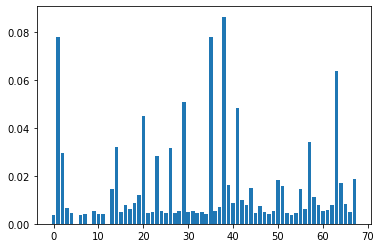

In [25]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Resampling the data using SMOTE

Trying to do oversampling using SMOTE to even the number of normal and abnormal on the target.

In [26]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Then use again the `RandomForestClassifier` to train the model.

In [28]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9671403197158082

Checking the predictions on the `X_test`.

In [29]:
y_test_pred = rf.predict(X_test)

Checking the True Positive and True Negative using `pd.crosstab` for the test dataset predictions.

In [30]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,1959,52
1,22,219


Printing the classification report on the test data set. 

In [32]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1981
           1       0.91      0.81      0.86       271

    accuracy                           0.97      2252
   macro avg       0.94      0.90      0.92      2252
weighted avg       0.97      0.97      0.97      2252



Now let us check the model on the validation set.

In [17]:
validation_set = rf.predict(X_validate)

Then also check the True Positive and True Negative for the validation set. 

In [33]:
print(classification_report(y_validate,validation_set))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1114
           1       0.88      0.82      0.85       137

    accuracy                           0.97      1251
   macro avg       0.93      0.90      0.92      1251
weighted avg       0.97      0.97      0.97      1251



Then save the model using `pickle.dump()` function.

In [35]:
filename = '../Models/valve_model.sav'
pickle.dump(rf, open(filename, 'wb'))

And now we have the model for valve. :)